In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pickle

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df=df.drop(['Happiness Rank','Standard Error','Dystopia Residual'], axis=1)

In [4]:
df.describe().head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
      dtype='object')

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [7]:
#Plot graph between Happiness score and Economy

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

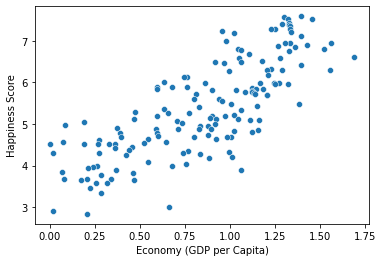

In [8]:
import seaborn as sns
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)

from above plot we can conclude that GDP between 0.75-1.30 has highest happiness score

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

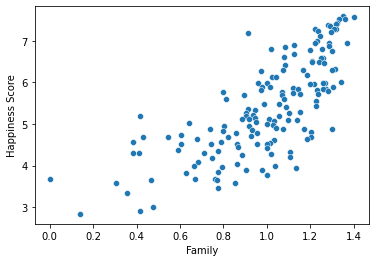

In [9]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)

This graph shows Family is contribtuing in Happiness score

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

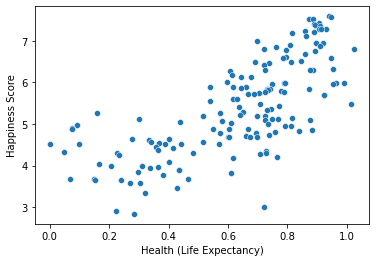

In [10]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)

from above plot we conclude that happiness score is high if person have good health and most of them lies between 0.7-0.9

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

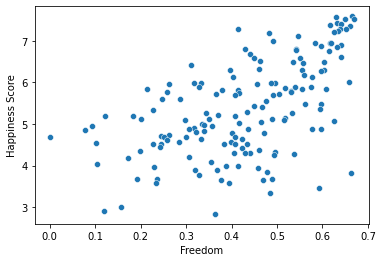

In [11]:
sns.scatterplot(x='Freedom',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

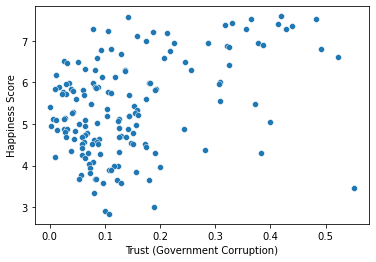

In [12]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)

This clearly indicated that country with less corruption has more happiness score

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

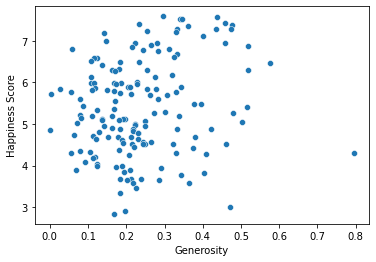

In [13]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)

check how dat is distributed

<AxesSubplot:xlabel='Family', ylabel='Density'>

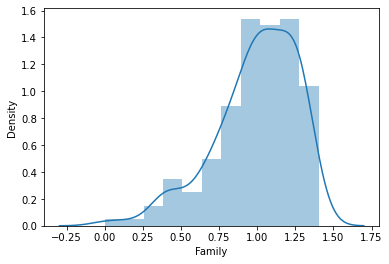

In [24]:
sns.distplot(df['Family'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

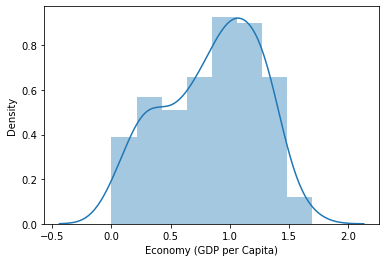

In [25]:
sns.distplot(df['Economy (GDP per Capita)'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

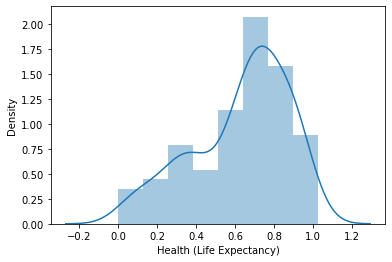

In [26]:
sns.distplot(df['Health (Life Expectancy)'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Freedom', ylabel='Density'>

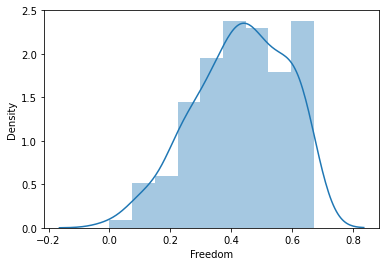

In [27]:
sns.distplot(df['Freedom'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

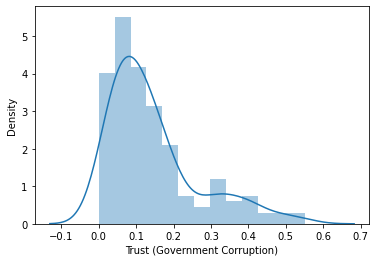

In [28]:
sns.distplot(df['Trust (Government Corruption)'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

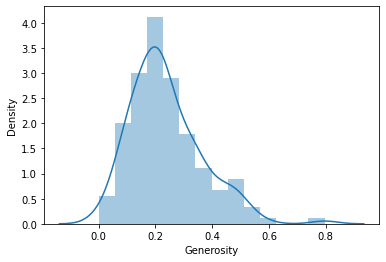

In [29]:
sns.distplot(df['Generosity'])

In [47]:
y=df['Happiness Score']
x=df.drop(['Happiness Score','Country','Region'],axis=1)

In [34]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [48]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [38]:
#divide data into train and test 

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=10, shuffle=True)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 6)
(48, 6)
(110,)
(48,)


In [53]:
regressor=LinearRegression()

In [52]:
#fit the data into model

In [54]:
regressor.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [61]:
regressor.score(x_train,y_train)

0.772546835915049

In [62]:
regressor.score(x_test,y_test)

0.7751177330025489

In [63]:
#plot and visualize

In [64]:
y_pred=regressor.predict(x_test)

In [65]:
y_pred

array([6.52418307, 5.61784381, 5.68100083, 6.21693961, 6.17833678,
       4.67747362, 4.60478938, 6.29549739, 5.96004136, 5.25984401,
       5.92247645, 5.87516803, 5.72960531, 6.84347601, 6.56459736,
       4.39578532, 5.82355924, 7.04721159, 5.37397928, 4.12280289,
       6.69376194, 4.84292383, 3.30681677, 4.13801508, 6.48078242,
       6.19869494, 5.56330814, 5.7848095 , 5.5755157 , 3.61463564,
       5.36256855, 5.79661679, 4.23009544, 6.0358189 , 4.7719928 ,
       7.11094477, 6.32416321, 5.06704814, 5.72558162, 4.53514593,
       6.16935388, 2.969396  , 5.68915312, 5.99356838, 4.33568808,
       6.02211443, 4.53109425, 4.11835384])

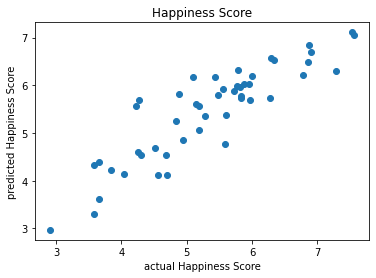

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Happiness Score')
plt.ylabel('predicted Happiness Score')
plt.title('Happiness Score')
plt.show()

Model Evaluation

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
mean_absolute_error(y_test,y_pred)

0.3989365257285637

In [69]:
mean_squared_error(y_test,y_pred)

0.269975530239376

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5195916956990132

In [ ]:
# saving the model

In [72]:
filename= 'Happyness_Score_Prediction'
pickle.dump(regressor, open(filename,'wb'))

Conclusion

In [73]:
a= np.array(y_test)
predicted=np.array(regressor.predict(x_test))
df_com= pd.DataFrame({"Original":a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,6.329,6.524183
1,5.140,5.617844
2,5.975,5.681001
3,6.786,6.216940
4,5.102,6.178337
5,4.514,4.677474
6,4.252,4.604789
7,7.278,6.295497
8,5.813,5.960041
9,4.839,5.259844
